<a href="https://colab.research.google.com/github/halisson-gomides/academia_QADS/blob/main/iFood_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## iFood Data Analyst Case

In [9]:
import numpy as np 
import pandas as pd 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [60]:
df = pd.read_csv('/content/data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [62]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [63]:
# Dropando as 24 linhas que contém nulos
df.dropna(inplace=True)

In [64]:
df.shape

(2216, 29)

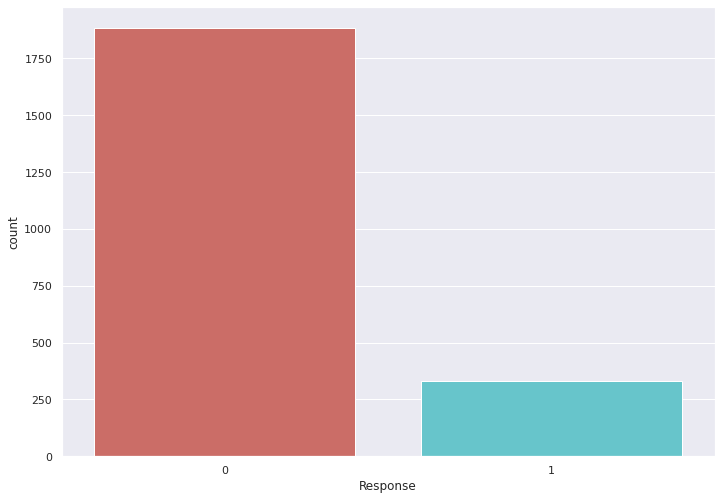

In [65]:
sns.countplot(x='Response',data=df,palette='hls');

In [66]:
df['Response'].value_counts()

0    1883
1     333
Name: Response, dtype: int64

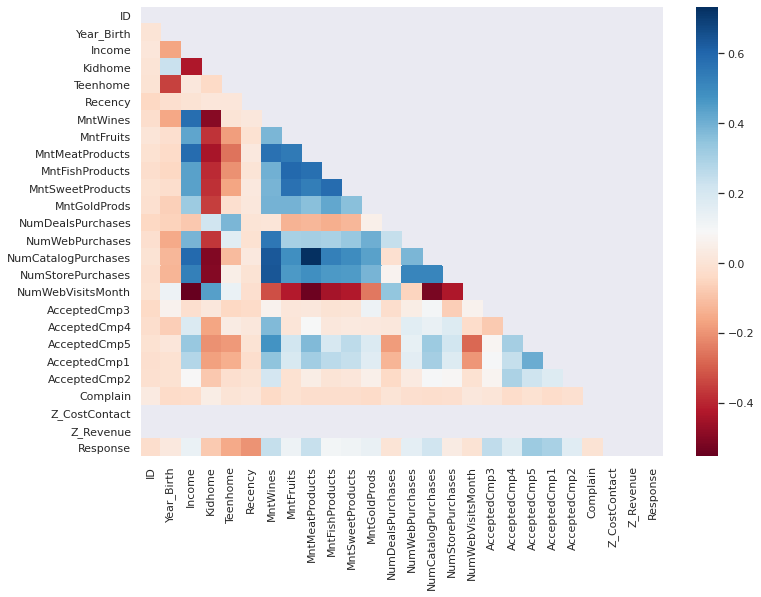

In [67]:

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=False, cmap='RdBu', mask=mask);

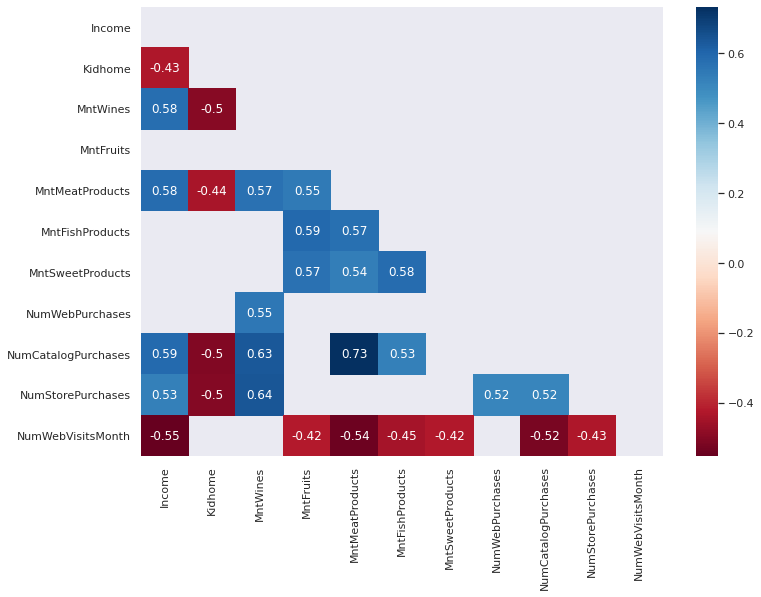

In [68]:
# filtrando as oorrelações maiorres que +0.5 e menores que -0.4
corr_forte = df.corr()[(df.corr() > 0.5) | (df.corr() < -0.4)]
# substituindo os valores das autocorrelações
corr_forte.replace(1,np.nan, inplace=True)
# retiando as linhas ecolunas sem alta correlação
corr_forte.dropna(how='all', inplace=True, axis=1)
corr_forte.dropna(how='all', inplace=True)

mask = np.triu(np.ones_like(corr_forte, dtype=bool))
sns.heatmap(corr_forte, annot=True, cmap='RdBu', mask=mask);

In [69]:
# colunas com alta correlação
corr_forte.columns

Index(['Income', 'Kidhome', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

**Vamos retirar as colunas que possuem alta correlação entre si**

In [70]:
# Retirando as colunas com alta correlação, com exceção da 'Income'
df_dropped = df.drop(columns = corr_forte.columns[1:].tolist())

# retirando as colunas ID, Dt_Customer, Z_CostContact, Z_Revenue, pois aparentemente elas não influenciam o modelo
df_dropped.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [73]:
# Fazendo o Enconding das colunas categóricas 'Education' e 'Marital_Status'
dummies_education = pd.get_dummies(df_dropped['Education'])
dummies_m_status = pd.get_dummies(df_dropped['Marital_Status'])

# Uma forma de fazer
# df = pd.concat([df, pd.get_dummies(df['Education'])], axis=1).drop('Education', axis=1)
# df = pd.concat([df, pd.get_dummies(df['Marital_Status'])], axis=1).drop('Marital_Status', axis=1)

# Outra forma de fazer
df_dummie = df_dropped.join(dummies_education).drop('Education', axis=1)
df_dummie = df_dummie.join(dummies_m_status).drop('Marital_Status', axis=1)
df_dummie.head()

,Year_Birth,Income,Teenhome,Recency,MntGoldProds,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,2n Cycle,Basic,Graduation,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,1957,58138.0,0,58,88,3,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,38,6,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,26,42,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1984,26646.0,0,26,5,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1981,58293.0,0,94,15,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


**Ajustando a escala das variáveis**

In [74]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(df_dummie)
df_scaler = pd.DataFrame(scaler.transform(df_dummie), columns=df_dummie.columns)
df_scaler.head()

,Year_Birth,Income,Teenhome,Recency,MntGoldProds,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,2n Cycle,Basic,Graduation,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,0.621359,0.084832,0.0,0.585859,0.274143,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.592233,0.067095,0.5,0.383838,0.018692,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.699029,0.105097,0.0,0.262626,0.130841,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.883495,0.037471,0.0,0.262626,0.015576,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.854369,0.085065,0.0,0.949495,0.046729,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**TREINO DO MODELO**

In [81]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix

In [76]:
# Separando em treino e teste extratificado em decorrência do desbalanceamento das classes
target = "Response"
y = df_scaler[target]
x = df_scaler.drop(target, axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [77]:
clf_1 = LogisticRegression(random_state=42, solver='lbfgs',max_iter=2000).fit(x_train, y_train)


In [78]:
preds_1 = clf_1.predict(x_test)
print(accuracy_score(y_test, preds_1))

0.8947368421052632


In [79]:
r2 = r2_score(y_test, preds_1) 
print('\nR2 Score {}'.format(r2))



R2 Score 0.17610619469026556


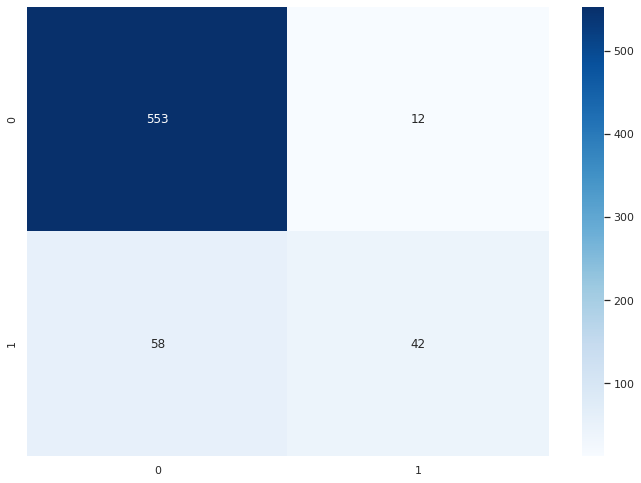

In [84]:
# Matriz de Confusão
cm = confusion_matrix(y_test,preds_1)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d');